In [1]:
import numpy as np 
import pandas as pd 
import re  # search pattern in string ( text) 
import nltk # nlp 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
farmer=pd.read_csv(r"C:\Users\admin\Imarticus\PGA-34\Project\NLP\tweet.csv")

In [3]:
farmer.shape

(6027, 3)

In [4]:
farmer.head()

,tweet,existence,existence_confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [5]:
data=pd.DataFrame(farmer.tweet)
data.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


In [6]:
data.iloc[100,0]  # [ Row , Column]

'RT @disturbedwater: Climate change increases heat waves, floods: EPA [link]'

In [7]:
data.iloc[10,0]

'How do we solve this global warming thing? [link]'

# Converted to Lower 

In [8]:
data.tweet=data.tweet.str.lower()

In [9]:
data.iloc[3,0]

'carbon offsets: how a vatican forest failed to reduce global warming [link]'

In [10]:
data.iloc[10,0]

'how do we solve this global warming thing? [link]'

# Removing Url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [11]:
data.tweet = data.tweet.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[3,0]

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\31648632.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.tweet = data.tweet.str.replace(r'http\S+|www.\S+','',case=False)


'carbon offsets: how a vatican forest failed to reduce global warming [link]'

# Remove punctuation

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(abc):
    tweet_nopunt="".join([c  # c= delhi
                         for c in abc # c = Delhi 
                         if c not in string.punctuation])
    return tweet_nopunt

In [14]:
data.tweet=data.tweet.apply(lambda x : remove_punctuation(x)) # Text = x

In [15]:
data.iloc[3,0]

'carbon offsets how a vatican forest failed to reduce global warming link'

In [16]:
data.iloc[10,0]

'how do we solve this global warming thing link'

# Remove Number

In [17]:
data.iloc[3,0]

'carbon offsets how a vatican forest failed to reduce global warming link'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [18]:
data.tweet = data.tweet.str.replace('\d+','')

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\2177782205.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.tweet = data.tweet.str.replace('\d+','')


In [19]:
data.iloc[3,0]

'carbon offsets how a vatican forest failed to reduce global warming link'

# Removing Stop Words

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Import stopwords with nltk.
from nltk.corpus import stopwords # corpus is collection of word in sentence
stop = stopwords.words('English')

In [22]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data.iloc[40,0]

'proof theres no climate change rt jazgar ft killer tsunami created in a peruvian lake when a glacier fractures  falls into the lake'

In [24]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data.tweet = data.tweet.apply(lambda x: ' '.join([c   # form  is not added   # text = x
                                                      for c in x.split()  # c = from
                                                      if c not in (stop)]))

In [25]:
data.iloc[45,0]

'liberal looney toons global warming alarmist comes home artic frost bite gathercom wont learn huh lo link'

# Common Words

In [26]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Carapa',
 'anaematosis',
 'atrabiliarious',
 'phlebotomical',
 'screeve',
 'crepiness',
 'Fissilinguia',
 'uninundated',
 'protectorial',
 'suburbanhood',
 'granulator',
 'sigillistic',
 'traitor',
 'apart',
 'outjazz',
 'exterminist',
 'strainproof',
 'decyne',
 'nonsympathizer',
 'tillable',
 'undying',
 'subliminal',
 'churchscot',
 'brought',
 'capitally',
 'Hoplocephalus',
 'flibbertigibbet',
 'gardenhood',
 'palatineship',
 'Haemonchus',
 'ragtimey',
 'chinoa',
 'dehydrase',
 'pseudoephedrine',
 'moiley',
 'rubberize',
 'untapestried',
 'chitterling',
 'Pitta',
 'platelayer',
 'unshipment',
 'chosen',
 'unmeant',
 'feuilletonism',
 'peropod',
 'pharyngalgic',
 'Thecosomata',
 'poikilothermism',
 'triradiate',
 'inobtrusively',
 'isogenesis',
 'unpredicated',
 'Saccharum',
 'finish',
 'allocate',
 'decopperize',
 'sarcode',
 'monopetalous',
 'trophoneurotic',
 'ashlar',
 'corporas',
 'profection',
 'refrenzy',
 'freeboard',
 'fittyfied',
 'seroprognosis',
 'kiva',
 'heavenliness

In [27]:
tweet=data.tweet[20]
tweet

'global warming ocean chemistry changing faster years thats carbon link'

In [28]:
# Apply a second round of cleaning
def clean_tweet_round2(tweet):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    tweet =  re.sub(r"\b[a-zA-Z]\b", "", tweet) ## 1 alphabet like S or s
    tweet =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", tweet)  ## 2 alphabet like ab or ad 
    tweet =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(tweet)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return tweet

round2 = lambda x: clean_tweet_round2(x)

In [29]:
data.iloc[40,0]

'proof theres climate change rt jazgar ft killer tsunami created peruvian lake glacier fractures falls lake'

In [30]:
# Let's take a look at the updated text
data = pd.DataFrame(data.tweet.apply(round2))
data.iloc[30,0]

'worse ever blame global warming link'

# Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
def lemmatize_tweet(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [33]:
data.iloc[90,0]

'live tonight fellow heather climate change expert discuss real climate link'

In [34]:
import nltk
nltk.download('omw-1.4')
data.tweet = data.tweet.apply(lambda x :' '.join(lemmatize_tweet(x)))  # text = x
data.iloc[90,0]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'live tonight fellow heather climate change expert discuss real climate link'

# Strip extra whitespace

In [35]:
data.iloc[45,0]

'liberal looney global warm alarmist come home frost bite wont learn huh link'

In [36]:
data.tweet = data.tweet.str.rstrip()
data.iloc[45,0]

'liberal looney global warm alarmist come home frost bite wont learn huh link'

* Finished Data Pre-Processing or Data Cleaning

### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [37]:
data.head()

,tweet
0,global warm report world hunger link
1,fight poverty global warm link
2,carbon forest reduce global warm link
3,carbon forest reduce global warm link
4,vulnerable climate change link


In [38]:
data.tweet[45]

'liberal looney global warm alarmist come home frost bite wont learn huh link'

In [39]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.tweet) # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
abatement,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abortion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yuck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,6018,6019,6020,6021,6022,6023,6024,6025,6026,freq
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
abatement,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
abnormal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abortion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [41]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,6018,6019,6020,6021,6022,6023,6024,6025,6026,freq
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,abatement,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,abnormal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,abortion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [42]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\218960368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.rename(columns = {'index':'Word'}, inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_15680\218960368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
539,climate,3594
484,change,3284
1320,global,3126
3265,warm,2911
1775,link,989
...,...,...
895,dishonest,1
2296,probe,1
896,disingenuous,1
2293,prob,1


# Barplot 

In [43]:
tdm1.head(10)

,Word,freq
539,climate,3594
484,change,3284
1320,global,3126
3265,warm,2911
1775,link,989
1998,new,324
1999,news,244
2777,snow,238
2611,science,200
1028,energy,194


In [44]:
w = tdm1[tdm1['freq'] >120]
w

,Word,freq
539,climate,3594
484,change,3284
1320,global,3126
3265,warm,2911
1775,link,989
1998,new,324
1999,news,244
2777,snow,238
2611,science,200
1028,energy,194


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


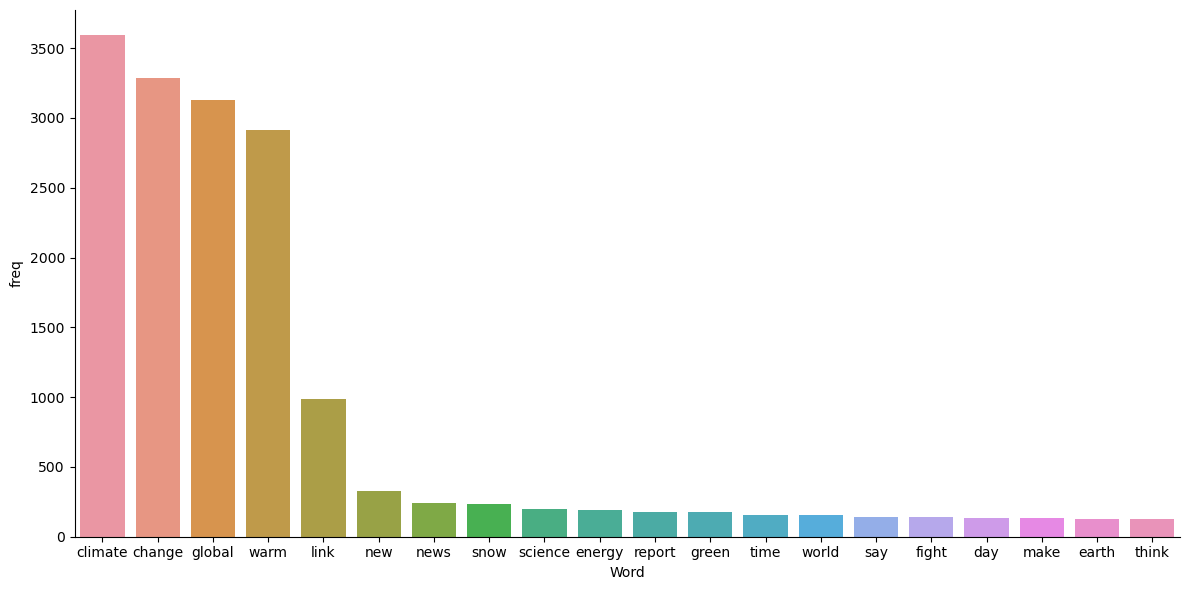

In [45]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [46]:
text = " ".join(review for review in data.tweet)
print ("There are {} words in the combination of all review.".format(len(tweet)))

There are 70 words in the combination of all review.


In [47]:
#!pip install wordcloud

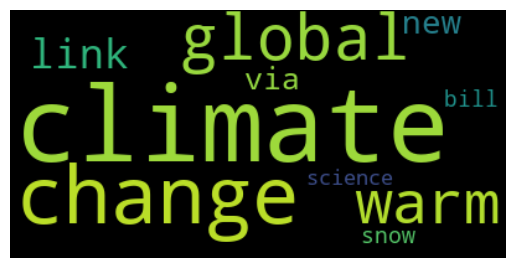

In [48]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False, # the frequency of word should not display that frequncy no. time we use collocation
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [49]:
data

,tweet
0,global warm report world hunger link
1,fight poverty global warm link
2,carbon forest reduce global warm link
3,carbon forest reduce global warm link
4,vulnerable climate change link
...,...
6022,phrase global warm abandon favor climate change
6023,investigate global warm scientist
6024,global warm tube parody enjoy
6025,golfer dont dare tell global warm make cut


In [50]:
data = data.drop_duplicates('tweet') 
data

,tweet
0,global warm report world hunger link
1,fight poverty global warm link
2,carbon forest reduce global warm link
4,vulnerable climate change link
5,ocean saltiness global warm water cycle link
...,...
6021,climb august weather first day may unbelievabl...
6022,phrase global warm abandon favor climate change
6024,global warm tube parody enjoy
6025,golfer dont dare tell global warm make cut


In [51]:
#! pip install textblob

In [52]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['tweet'].apply(pol)
data.head(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\3933782003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['tweet'].apply(pol)


,tweet,polarity
0,global warm report world hunger link,0.3
1,fight poverty global warm link,0.3
2,carbon forest reduce global warm link,0.3
4,vulnerable climate change link,-0.5
5,ocean saltiness global warm water cycle link,0.3


In [53]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\63336241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')


,tweet,polarity,Sentiment
0,global warm report world hunger link,0.3,Positive
1,fight poverty global warm link,0.3,Positive
2,carbon forest reduce global warm link,0.3,Positive
4,vulnerable climate change link,-0.5,Negative
5,ocean saltiness global warm water cycle link,0.3,Positive


<AxesSubplot:>

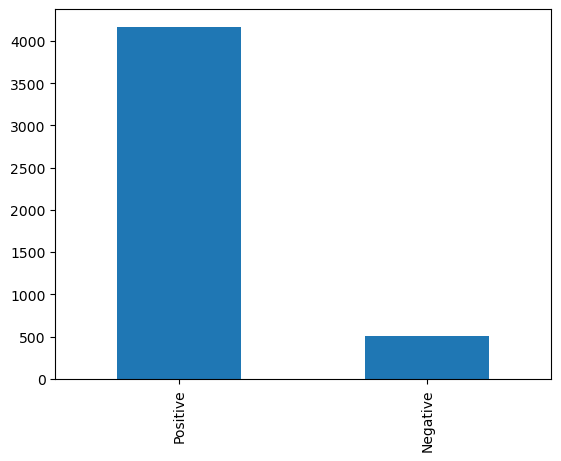

In [54]:
data.Sentiment.value_counts().plot.bar()

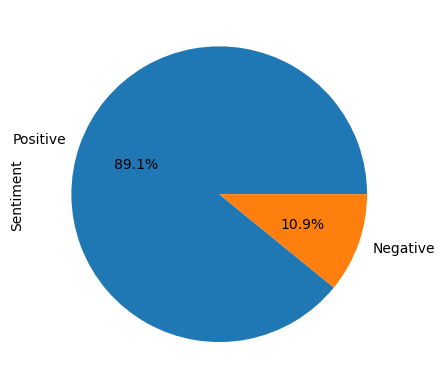

In [55]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

# Finish